## 2024 Week 11 - 13 months in a year
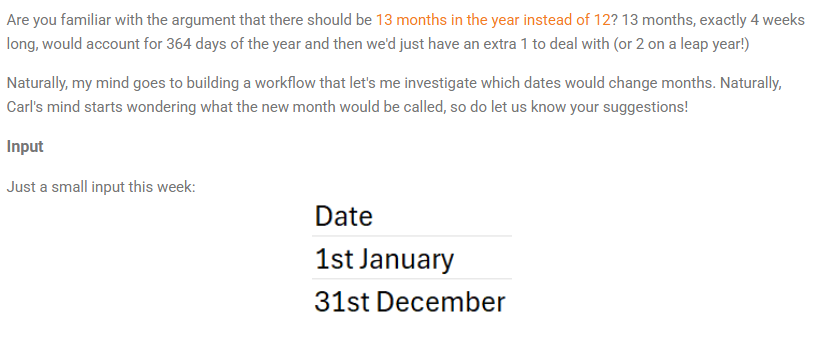
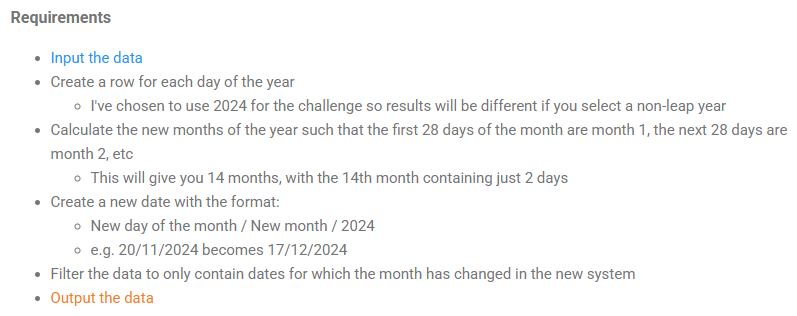

In [103]:
import pandas as pd
import numpy as np

In [104]:
df = pd.read_csv('2024W11 Input.csv')
df.head()

,Date
0,1st January
1,31st December


#### Create a row for each day of the year
I've chosen to use 2024 for the challenge so results will be different if you select a non-leap year

In [106]:
df['Date'] = df['Date'] + ' 2024'
df.Date

0      1st January 2024
1    31st December 2024
Name: Date, dtype: object

In [107]:
df.Date = pd.to_datetime(df.Date)
df.Date

0   2024-01-01
1   2024-12-31
Name: Date, dtype: datetime64[ns]

In [108]:
date = pd.Series(pd.date_range(start=df.Date[0], end=df.Date[1])).values
df = pd.DataFrame({'Date': date})

In [109]:
df

,Date
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05
...,...
361,2024-12-27
362,2024-12-28
363,2024-12-29
364,2024-12-30


#### Calculate the new months of the year such that the first 28 days of the month are month 1, the next 28 days are month 2, etc
This will give you 14 months, with the 14th month containing just 2 days

In [111]:
df['Month'] = df.Date.dt.month
df['Day of Year'] = df.Date.dt.dayofyear

In [112]:
df['New Month'] = np.ceil(df['Day of Year'] / 28).astype(int)
df['New day of Month'] = df.groupby(['New Month'])['Date'].rank('first').astype(int)
df.head()

,Date,Month,Day of Year,New Month,New day of Month
0,2024-01-01,1,1,1,1
1,2024-01-02,1,2,1,2
2,2024-01-03,1,3,1,3
3,2024-01-04,1,4,1,4
4,2024-01-05,1,5,1,5


#### Create a new date with the format:
- New day of the month / New month / 2024
- e.g. 20/11/2024 becomes 17/12/2024


In [114]:
df['New Date'] = df['New day of Month'].astype(str).str.pad(2, fillchar='0') + '/' + \
                df['New Month'].astype(str).str.pad(2, fillchar='0') + '/' + '2024'
df.head()

,Date,Month,Day of Year,New Month,New day of Month,New Date
0,2024-01-01,1,1,1,1,01/01/2024
1,2024-01-02,1,2,1,2,02/01/2024
2,2024-01-03,1,3,1,3,03/01/2024
3,2024-01-04,1,4,1,4,04/01/2024
4,2024-01-05,1,5,1,5,05/01/2024


#### Filter the data to only contain dates for which the month has changed in the new system


In [116]:
month_changed = df[df['Month'] != df['New Month']][['Date', 'New Date']]
month_changed

,Date,New Date
28,2024-01-29,01/02/2024
29,2024-01-30,02/02/2024
30,2024-01-31,03/02/2024
56,2024-02-26,01/03/2024
57,2024-02-27,02/03/2024
...,...,...
361,2024-12-27,26/13/2024
362,2024-12-28,27/13/2024
363,2024-12-29,28/13/2024
364,2024-12-30,01/14/2024
